In [18]:
# Install the required libraries
!pip install prophet

In [19]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline

In [20]:
# Download the lyft_Dec_21.parquet file from Google Drive
!gdown https://drive.google.com/uc?id=1mV0alGsQJI9-SioD21VUdIKUtQemqvtj

^C


Downloading...
From (original): https://drive.google.com/uc?id=1mV0alGsQJI9-SioD21VUdIKUtQemqvtj
From (redirected): https://drive.google.com/uc?id=1mV0alGsQJI9-SioD21VUdIKUtQemqvtj&confirm=t&uuid=435bef82-d334-43b2-894a-95ea62675a7a
To: c:\Users\Tom\Bootcamp\Projects\project1_group1_osubootcamp\lyft_Dec_21.parquet

  0%|          | 0.00/105M [00:00<?, ?B/s]
  1%|          | 1.05M/105M [00:00<00:12, 8.67MB/s]
  3%|▎         | 3.67M/105M [00:00<00:05, 18.0MB/s]
  6%|▋         | 6.82M/105M [00:00<00:04, 22.1MB/s]
  9%|▉         | 9.96M/105M [00:00<00:03, 24.1MB/s]
 12%|█▏        | 13.1M/105M [00:00<00:03, 25.1MB/s]
 15%|█▌        | 16.3M/105M [00:00<00:03, 25.7MB/s]
 18%|█▊        | 19.4M/105M [00:00<00:03, 26.1MB/s]
 21%|██▏       | 22.5M/105M [00:00<00:03, 26.4MB/s]
 24%|██▍       | 25.7M/105M [00:01<00:03, 26.4MB/s]
 27%|██▋       | 28.8M/105M [00:01<00:02, 26.7MB/s]
 30%|███       | 32.0M/105M [00:01<00:02, 25.6MB/s]
 33%|███▎      | 35.1M/105M [00:01<00:02, 25.7MB/s]
 36%|███▌      |

In [4]:
# Download the lyft_Dec_22.parquet file from Google Drive
!gdown https://drive.google.com/uc?id=1k7DROBFpkx-rJWGHUsGDb2T_eTyafBq8

Downloading...
From (original): https://drive.google.com/uc?id=1k7DROBFpkx-rJWGHUsGDb2T_eTyafBq8
From (redirected): https://drive.google.com/uc?id=1k7DROBFpkx-rJWGHUsGDb2T_eTyafBq8&confirm=t&uuid=1be6cde0-375d-44da-ae2c-c8d17abc5fa6
To: c:\Users\Tom\Bootcamp\Projects\project1_group1_osubootcamp\lyft_Dec_22.parquet

  0%|          | 0.00/137M [00:00<?, ?B/s]
  0%|          | 524k/137M [00:00<00:26, 5.12MB/s]
  2%|▏         | 3.15M/137M [00:00<00:07, 16.9MB/s]
  4%|▍         | 5.77M/137M [00:00<00:06, 21.0MB/s]
  7%|▋         | 8.91M/137M [00:00<00:05, 23.5MB/s]
  9%|▉         | 12.1M/137M [00:00<00:05, 24.9MB/s]
 11%|█         | 15.2M/137M [00:00<00:04, 25.6MB/s]
 13%|█▎        | 18.4M/137M [00:00<00:04, 26.1MB/s]
 16%|█▌        | 21.5M/137M [00:00<00:04, 26.4MB/s]
 18%|█▊        | 24.6M/137M [00:01<00:04, 26.6MB/s]
 20%|██        | 27.8M/137M [00:01<00:04, 26.7MB/s]
 23%|██▎       | 30.9M/137M [00:01<00:03, 26.7MB/s]
 25%|██▍       | 34.1M/137M [00:01<00:03, 26.9MB/s]
 27%|██▋       | 

In [31]:
# Read the lyft_Dec_21.parquet, lyft_Dec_22.parquet, and lyft_Dec_23.parquet files into DataFrames.
lyft_21_df = pd.read_parquet("lyft_Dec_21.parquet")
lyft_22_df = pd.read_parquet("lyft_Dec_22.parquet")
lyft_23_df = pd.read_parquet("lyft_Dec_23.parquet")

# Set the `pickup_datetime` as the index to the DataFrame.
lyft_21_df.set_index("pickup_datetime", inplace=True, drop=False)  
lyft_22_df.set_index("pickup_datetime", inplace=True, drop=False)
lyft_23_df.set_index("pickup_datetime", inplace=True, drop=False)

# Display the first 5 rows of the DataFrames.
display(lyft_21_df.head())
display(lyft_22_df.head())
display(lyft_23_df.head())

,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2021-12-01 00:00:00,2021-12-01 00:00:00,2021-12-01 00:46:34,138,265,14.172,2794,42.72,20.66,1.98,0.00,0.00,0.0,0.0,40.51,65.36
2021-12-01 00:00:01,2021-12-01 00:00:01,2021-12-01 00:07:41,211,4,1.655,460,14.43,0.00,0.43,1.28,2.75,0.0,0.0,5.69,18.89
2021-12-01 00:00:02,2021-12-01 00:00:02,2021-12-01 00:09:17,163,239,2.195,576,11.61,0.00,0.35,1.03,2.75,0.0,0.0,7.26,15.74
2021-12-01 00:00:02,2021-12-01 00:00:02,2021-12-01 00:07:35,174,254,1.356,453,7.15,0.00,0.21,0.63,0.00,0.0,0.0,5.47,7.99
2021-12-01 00:00:03,2021-12-01 00:00:03,2021-12-01 00:08:33,61,62,1.430,510,7.22,0.00,0.22,0.64,0.00,0.0,0.0,5.86,8.08


,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2022-12-01 00:00:01,2022-12-01 00:00:01,2022-12-01 00:28:16,132,25,19.092,1695,55.69,0.0,1.75,5.16,0.00,2.5,11.72,37.24,76.82
2022-12-01 00:00:01,2022-12-01 00:00:01,2022-12-01 00:16:10,230,263,2.814,969,18.14,0.0,0.54,1.61,2.75,0.0,0.00,11.87,23.04
2022-12-01 00:00:01,2022-12-01 00:00:01,2022-12-01 00:14:53,41,41,1.426,892,11.15,0.0,0.16,0.47,0.00,0.0,0.00,9.58,11.78
2022-12-01 00:00:03,2022-12-01 00:00:03,2022-12-01 00:15:53,181,80,6.524,950,20.48,0.0,0.61,1.82,0.00,0.0,0.00,16.01,22.91
2022-12-01 00:00:03,2022-12-01 00:00:03,2022-12-01 00:14:28,213,3,5.343,865,15.11,0.0,0.45,1.34,0.00,0.0,0.00,13.89,16.90


,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,Total_Passenger_Cost
pickup_datetime,,,,,,,,,,,,,,,
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:06,130,216,3.882,1506,14.17,0.00,0.39,1.26,0.00,0.0,10.0,19.43,25.82
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 00:25:31,170,61,8.530,1531,37.25,2.24,1.08,3.48,2.75,0.0,0.0,25.80,46.80
2023-12-01 00:00:00,2023-12-01 00:00:00,2023-12-01 01:05:08,158,265,18.970,3908,59.29,22.44,2.25,0.00,0.00,0.0,0.0,67.70,83.98
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:19:44,238,185,10.432,1183,28.39,0.24,0.79,2.54,2.75,0.0,0.0,25.00,34.71
2023-12-01 00:00:01,2023-12-01 00:00:01,2023-12-01 00:22:25,216,61,9.309,1344,29.56,0.00,0.81,2.62,0.00,0.0,0.0,25.05,32.99


In [32]:
# Group the DataFrames by date and calculate the total passenger cost for each day.
lyft_21_Cost_df = lyft_21_df.groupby(lyft_21_df.index.date)["Total_Passenger_Cost"].sum()
lyft_22_Cost_df = lyft_22_df.groupby(lyft_22_df.index.date)["Total_Passenger_Cost"].sum()
lyft_23_Cost_df = lyft_23_df.groupby(lyft_23_df.index.date)["Total_Passenger_Cost"].sum()

# Display the first 5 rows of the DataFrames.
display(lyft_21_Cost_df.head())
display(lyft_22_Cost_df.head())
display(lyft_23_Cost_df.head())

2021-12-01    3761786.77
2021-12-02    4031446.44
2021-12-03    4622800.68
2021-12-04    5476415.93
2021-12-05    6180035.55
Name: Total_Passenger_Cost, dtype: float64

2022-12-01    5091177.57
2022-12-02    5406802.18
2022-12-03    5939219.55
2022-12-04    5480630.92
2022-12-05    4343212.44
Name: Total_Passenger_Cost, dtype: float64

2023-12-01    6685613.35
2023-12-02    6611579.64
2023-12-03    6877198.15
2023-12-04    5119050.26
2023-12-05    5314054.55
Name: Total_Passenger_Cost, dtype: float64

In [26]:
# Concatenate the lyft_21_Cost_df, lyft_22_Cost_df, and lyft_23_Cost_df DataFrames.
lyft_cost_df = pd.concat([lyft_21_Cost_df, lyft_22_Cost_df, lyft_23_Cost_df])
lyft_cost_df.head()

2021-12-01    3761786.77
2021-12-02    4031446.44
2021-12-03    4622800.68
2021-12-04    5476415.93
2021-12-05    6180035.55
Name: Total_Passenger_Cost, dtype: float64

In [36]:
# Reset the index and rename the columns 
prophet_cost_df = lyft_cost_df.reset_index()
prophet_cost_df.columns = ["ds", "y"]
prophet_cost_df.head()

,ds,y
0,2021-12-01,3761786.77
1,2021-12-02,4031446.44
2,2021-12-03,4622800.68
3,2021-12-04,5476415.93
4,2021-12-05,6180035.55


In [37]:
# Confirm that there are no NaN values
display(prophet_cost_df.tail())
prophet_cost_df = prophet_cost_df.dropna()
prophet_cost_df.tail()

,ds,y
88,2023-12-27,4892308.40
89,2023-12-28,5364945.63
90,2023-12-29,5876553.00
91,2023-12-30,5819716.86
92,2023-12-31,6414020.40


,ds,y
88,2023-12-27,4892308.40
89,2023-12-28,5364945.63
90,2023-12-29,5876553.00
91,2023-12-30,5819716.86
92,2023-12-31,6414020.40


In [93]:
# Call the Prophet function and store as an object
m_cost = Prophet()

# Fit the time series Prophet model
m_cost.fit(prophet_cost_df)

22:05:43 - cmdstanpy - INFO - Chain [1] start processing
22:05:44 - cmdstanpy - INFO - Chain [1] done processing


In [102]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future_cost = m_cost.make_future_dataframe(periods=366, freq='D')

future_cost = future_cost.drop(future_cost.index[-366:-31])
future_cost.reset_index(drop=True, inplace=True)

# Review the first 10 and last 40 rows of the DataFrame
display(future_cost.head(10))
display(future_cost.tail(40))

,ds
0,2021-12-01
1,2021-12-02
2,2021-12-03
3,2021-12-04
4,2021-12-05
5,2021-12-06
6,2021-12-07
7,2021-12-08
8,2021-12-09
9,2021-12-10


,ds
84,2023-12-23
85,2023-12-24
86,2023-12-25
87,2023-12-26
88,2023-12-27
89,2023-12-28
90,2023-12-29
91,2023-12-30
92,2023-12-31
93,2024-12-01


In [103]:
# Make a forecast based on the future DataFrame
forecast_cost = m_cost.predict(future_cost)

# Review the first five rows of the forecast DataFrame
display(forecast_cost.head())
display(forecast_cost.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,-5.376921e+06,3.180192e+06,4.150454e+06,-5.376921e+06,-5.376921e+06,9.058479e+06,9.058479e+06,9.058479e+06,-240347.964573,-240347.964573,-240347.964573,9.298826e+06,9.298826e+06,9.298826e+06,0.0,0.0,0.0,3.681557e+06
1,2021-12-02,-5.374003e+06,3.876312e+06,4.759246e+06,-5.374003e+06,-5.374003e+06,9.704503e+06,9.704503e+06,9.704503e+06,178401.610155,178401.610155,178401.610155,9.526101e+06,9.526101e+06,9.526101e+06,0.0,0.0,0.0,4.330500e+06
2,2021-12-03,-5.371085e+06,4.262274e+06,5.171612e+06,-5.371085e+06,-5.371085e+06,1.009915e+07,1.009915e+07,1.009915e+07,472512.263807,472512.263807,472512.263807,9.626640e+06,9.626640e+06,9.626640e+06,0.0,0.0,0.0,4.728068e+06
3,2021-12-04,-5.368166e+06,4.485805e+06,5.389420e+06,-5.368166e+06,-5.368166e+06,1.031346e+07,1.031346e+07,1.031346e+07,668757.247978,668757.247978,668757.247978,9.644698e+06,9.644698e+06,9.644698e+06,0.0,0.0,0.0,4.945289e+06
4,2021-12-05,-5.365248e+06,4.123777e+06,5.027303e+06,-5.365248e+06,-5.365248e+06,9.945061e+06,9.945061e+06,9.945061e+06,327591.275664,327591.275664,327591.275664,9.617469e+06,9.617469e+06,9.617469e+06,0.0,0.0,0.0,4.579812e+06


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
119,2024-12-27,-2.105277e+06,6.035431e+06,6.902176e+06,-2.105280e+06,-2.105274e+06,8.591008e+06,8.591008e+06,8.591008e+06,472512.263808,472512.263808,472512.263808,8.118496e+06,8.118496e+06,8.118496e+06,0.0,0.0,0.0,6.485731e+06
120,2024-12-28,-2.102362e+06,6.279106e+06,7.174557e+06,-2.102365e+06,-2.102359e+06,8.831779e+06,8.831779e+06,8.831779e+06,668757.247979,668757.247979,668757.247979,8.163022e+06,8.163022e+06,8.163022e+06,0.0,0.0,0.0,6.729417e+06
121,2024-12-29,-2.099448e+06,6.078729e+06,7.002931e+06,-2.099450e+06,-2.099445e+06,8.645896e+06,8.645896e+06,8.645896e+06,327591.275668,327591.275668,327591.275668,8.318305e+06,8.318305e+06,8.318305e+06,0.0,0.0,0.0,6.546449e+06
122,2024-12-30,-2.096533e+06,5.171710e+06,6.086188e+06,-2.096536e+06,-2.096530e+06,7.741937e+06,7.741937e+06,7.741937e+06,-849795.730948,-849795.730948,-849795.730948,8.591733e+06,8.591733e+06,8.591733e+06,0.0,0.0,0.0,5.645404e+06
123,2024-12-31,-2.093618e+06,5.894355e+06,6.792993e+06,-2.093621e+06,-2.093615e+06,8.426277e+06,8.426277e+06,8.426277e+06,-557118.702086,-557118.702086,-557118.702086,8.983396e+06,8.983396e+06,8.983396e+06,0.0,0.0,0.0,6.332659e+06


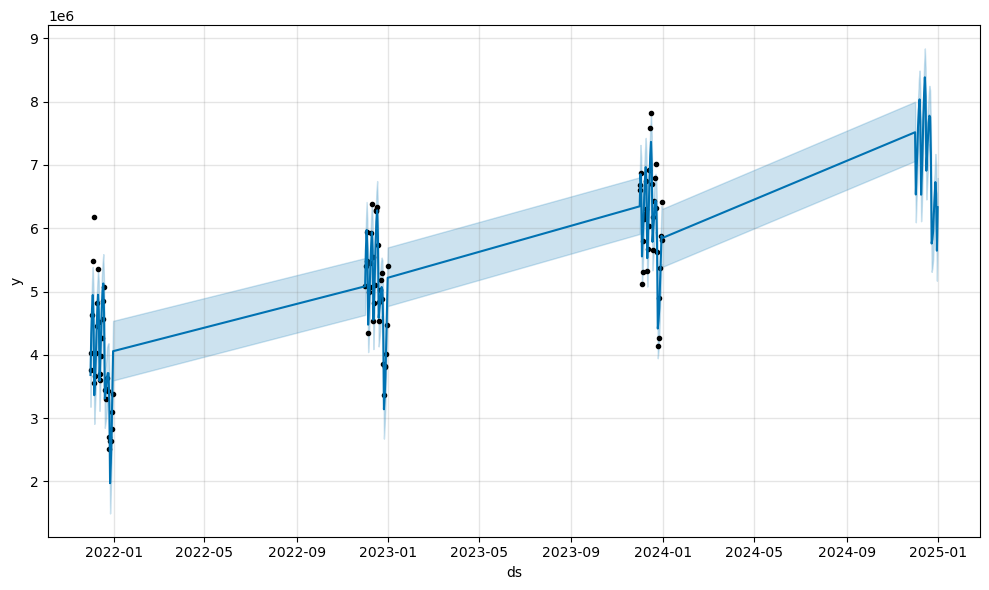

In [104]:
m_cost.plot(forecast_cost);

## Break Down the Forecast

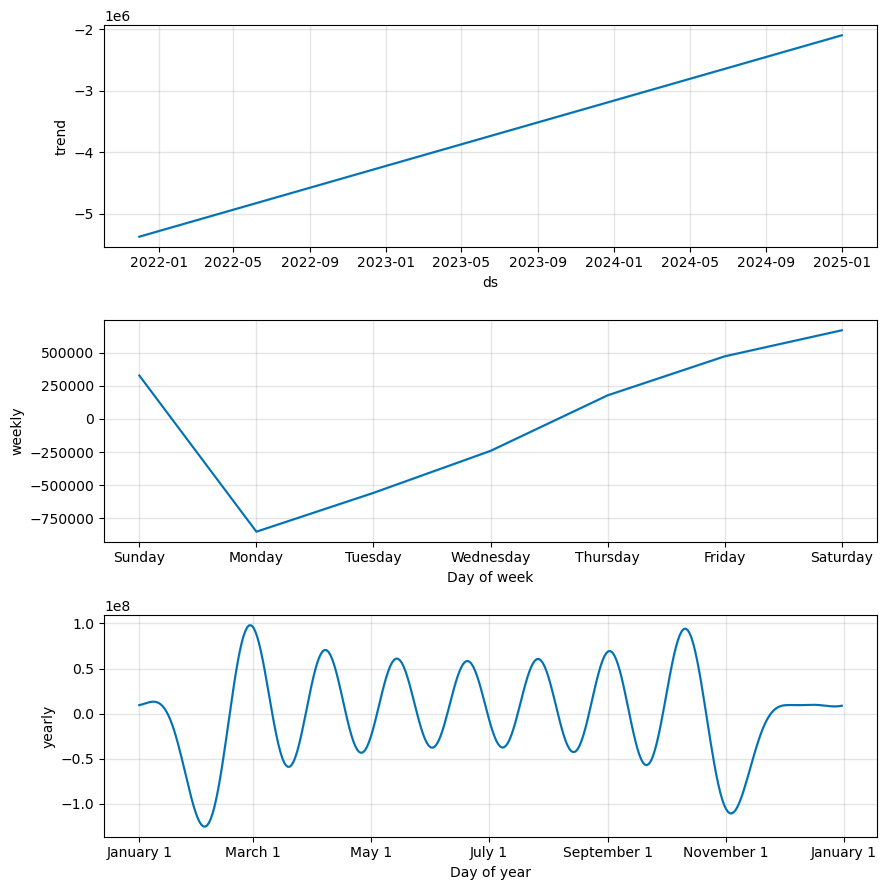

In [105]:
# Plot the individual time series components of the model
fig2 = m_cost.plot_components(forecast_cost);

- Doesn't make sense

## Plot the Upper and Lower Bounds of the Forecast

In [106]:
# Reset the index to this datetime column so that our plot looks nice
forecast_cost = forecast_cost.set_index('ds')
forecast_cost.tail(10)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2024-12-22,-2.119851e+06,6.718215e+06,7.635287e+06,-2.119852e+06,-2.119849e+06,9.298048e+06,9.298048e+06,9.298048e+06,327591.275665,327591.275665,327591.275665,8.970457e+06,8.970457e+06,8.970457e+06,0.0,0.0,0.0,7.178197e+06
2024-12-23,-2.116936e+06,5.311232e+06,6.219926e+06,-2.116938e+06,-2.116934e+06,7.875450e+06,7.875450e+06,7.875450e+06,-849795.730948,-849795.730948,-849795.730948,8.725246e+06,8.725246e+06,8.725246e+06,0.0,0.0,0.0,5.758514e+06
2024-12-24,-2.114021e+06,5.368782e+06,6.280032e+06,-2.114023e+06,-2.114019e+06,7.938827e+06,7.938827e+06,7.938827e+06,-557118.702086,-557118.702086,-557118.702086,8.495946e+06,8.495946e+06,8.495946e+06,0.0,0.0,0.0,5.824806e+06
2024-12-25,-2.111107e+06,5.500058e+06,6.404376e+06,-2.111109e+06,-2.111104e+06,8.063730e+06,8.063730e+06,8.063730e+06,-240347.964572,-240347.964572,-240347.964572,8.304078e+06,8.304078e+06,8.304078e+06,0.0,0.0,0.0,5.952623e+06
2024-12-26,-2.108192e+06,5.775321e+06,6.689685e+06,-2.108194e+06,-2.108189e+06,8.349820e+06,8.349820e+06,8.349820e+06,178401.610153,178401.610153,178401.610153,8.171418e+06,8.171418e+06,8.171418e+06,0.0,0.0,0.0,6.241628e+06
2024-12-27,-2.105277e+06,6.035431e+06,6.902176e+06,-2.105280e+06,-2.105274e+06,8.591008e+06,8.591008e+06,8.591008e+06,472512.263808,472512.263808,472512.263808,8.118496e+06,8.118496e+06,8.118496e+06,0.0,0.0,0.0,6.485731e+06
2024-12-28,-2.102362e+06,6.279106e+06,7.174557e+06,-2.102365e+06,-2.102359e+06,8.831779e+06,8.831779e+06,8.831779e+06,668757.247979,668757.247979,668757.247979,8.163022e+06,8.163022e+06,8.163022e+06,0.0,0.0,0.0,6.729417e+06
2024-12-29,-2.099448e+06,6.078729e+06,7.002931e+06,-2.099450e+06,-2.099445e+06,8.645896e+06,8.645896e+06,8.645896e+06,327591.275668,327591.275668,327591.275668,8.318305e+06,8.318305e+06,8.318305e+06,0.0,0.0,0.0,6.546449e+06
2024-12-30,-2.096533e+06,5.171710e+06,6.086188e+06,-2.096536e+06,-2.096530e+06,7.741937e+06,7.741937e+06,7.741937e+06,-849795.730948,-849795.730948,-849795.730948,8.591733e+06,8.591733e+06,8.591733e+06,0.0,0.0,0.0,5.645404e+06


<Axes: xlabel='ds'>

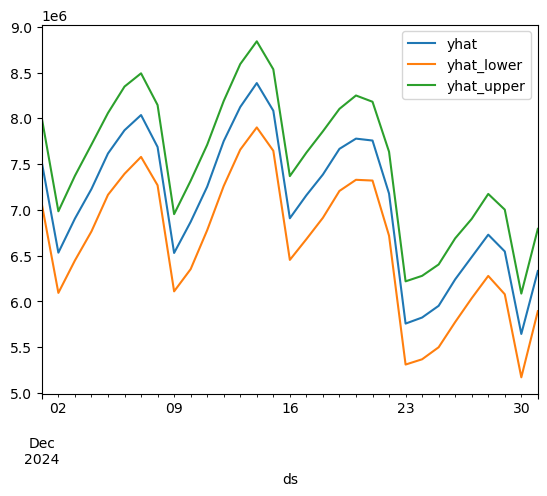

In [107]:
# Plot predictions for our forecast period
forecast_cost[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-31:,:].plot()

In [24]:
# Group the DataFrames by date and calculate the number of trips for each day.
lyft_21_Count_df = lyft_21_df.groupby([lyft_21_df.index.date])["PULocationID"].count()
lyft_22_Count_df = lyft_22_df.groupby([lyft_22_df.index.date])["PULocationID"].count()
lyft_23_Count_df = lyft_23_df.groupby([lyft_23_df.index.date])["PULocationID"].count()

# Display the first 5 rows of the DataFrames.
display(lyft_21_Count_df.head())
display(lyft_22_Count_df.head())
display(lyft_23_Count_df.head())


2021-12-01    136890
2021-12-02    141684
2021-12-03    167948
2021-12-04    184653
2021-12-05    152947
Name: PULocationID, dtype: int64

2022-12-01    187099
2022-12-02    206720
2022-12-03    230342
2022-12-04    188604
2022-12-05    161900
Name: PULocationID, dtype: int64

2023-12-01    229301
2023-12-02    227712
2023-12-03    219973
2023-12-04    172382
2023-12-05    177039
Name: PULocationID, dtype: int64

In [27]:
# Concatenate the lyft_21_Count_df, lyft_22_Count_df, and lyft_23_Count_df DataFrames.
lyft_count_df = pd.concat([lyft_21_Count_df, lyft_22_Count_df, lyft_23_Count_df])
lyft_count_df.head()

2021-12-01    136890
2021-12-02    141684
2021-12-03    167948
2021-12-04    184653
2021-12-05    152947
Name: PULocationID, dtype: int64

In [126]:
# Reset the index and rename the columns 
prophet_count_df = lyft_count_df.reset_index()
prophet_count_df.columns = ["ds", "y"]
prophet_count_df.head()

,ds,y
0,2021-12-01,136890
1,2021-12-02,141684
2,2021-12-03,167948
3,2021-12-04,184653
4,2021-12-05,152947


In [127]:
# Confirm that there are no NaN values
display(prophet_count_df.tail())
prophet_count_df = prophet_count_df.dropna()
prophet_count_df.tail()

,ds,y
88,2023-12-27,168767
89,2023-12-28,183504
90,2023-12-29,199835
91,2023-12-30,201478
92,2023-12-31,224996


,ds,y
88,2023-12-27,168767
89,2023-12-28,183504
90,2023-12-29,199835
91,2023-12-30,201478
92,2023-12-31,224996


In [128]:
# Call the Prophet function and store as an object
m_count = Prophet()

# Fit the time series Prophet model
m_count.fit(prophet_count_df)

22:16:45 - cmdstanpy - INFO - Chain [1] start processing
22:16:46 - cmdstanpy - INFO - Chain [1] done processing


In [129]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future_count = m_cost.make_future_dataframe(periods=366, freq='D')

future_count = future_count.drop(future_count.index[-366:-31])
future_count.reset_index(drop=True, inplace=True)

# Review the first 10 and last 40 rows of the DataFrame
display(future_count.head(10))
display(future_count.tail(40))

,ds
0,2021-12-01
1,2021-12-02
2,2021-12-03
3,2021-12-04
4,2021-12-05
5,2021-12-06
6,2021-12-07
7,2021-12-08
8,2021-12-09
9,2021-12-10


,ds
84,2023-12-23
85,2023-12-24
86,2023-12-25
87,2023-12-26
88,2023-12-27
89,2023-12-28
90,2023-12-29
91,2023-12-30
92,2023-12-31
93,2024-12-01


In [130]:
# Make a forecast based on the future DataFrame
forecast_count = m_count.predict(future_count)

# Review the first five rows of the forecast DataFrame
display(forecast_count.head())
display(forecast_count.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-12-01,-5313.562792,124919.144411,150619.885932,-5313.562792,-5313.562792,142624.312743,142624.312743,142624.312743,-8096.800175,-8096.800175,-8096.800175,150721.112918,150721.112918,150721.112918,0.0,0.0,0.0,137310.749950
1,2021-12-02,-5197.068471,135939.102767,161769.115935,-5197.068471,-5197.068471,153825.533438,153825.533438,153825.533438,2392.032940,2392.032940,2392.032940,151433.500498,151433.500498,151433.500498,0.0,0.0,0.0,148628.464967
2,2021-12-03,-5080.574149,149899.174158,175826.506793,-5080.574149,-5080.574149,167958.779269,167958.779269,167958.779269,16985.103325,16985.103325,16985.103325,150973.675944,150973.675944,150973.675944,0.0,0.0,0.0,162878.205120
3,2021-12-04,-4964.079827,157393.448781,182619.583617,-4964.079827,-4964.079827,175173.368779,175173.368779,175173.368779,25296.758838,25296.758838,25296.758838,149876.609941,149876.609941,149876.609941,0.0,0.0,0.0,170209.288952
4,2021-12-05,-4847.585505,134987.915595,159563.117161,-4847.585505,-4847.585505,152219.910378,152219.910378,152219.910378,3628.954113,3628.954113,3628.954113,148590.956265,148590.956265,148590.956265,0.0,0.0,0.0,147372.324873


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
119,2024-12-27,80527.588962,196216.909867,221869.124257,80485.954668,80570.357215,129670.840422,129670.840422,129670.840422,16985.103325,16985.103325,16985.103325,112685.737097,112685.737097,112685.737097,0.0,0.0,0.0,210198.429384
120,2024-12-28,80583.538304,207935.151705,233645.925712,80538.785273,80628.875388,139950.659493,139950.659493,139950.659493,25296.758838,25296.758838,25296.758838,114653.900655,114653.900655,114653.900655,0.0,0.0,0.0,220534.197797
121,2024-12-29,80639.487645,191947.845446,216784.421610,80591.738040,80688.026120,123786.928377,123786.928377,123786.928377,3628.954113,3628.954113,3628.954113,120157.974264,120157.974264,120157.974264,0.0,0.0,0.0,204426.416022
122,2024-12-30,80695.436987,174327.235928,200341.053912,80644.969250,80747.492039,106322.123434,106322.123434,106322.123434,-23493.823039,-23493.823039,-23493.823039,129815.946473,129815.946473,129815.946473,0.0,0.0,0.0,187017.560421
123,2024-12-31,80751.386329,194780.604249,221169.649542,80697.759847,80805.541822,127456.425408,127456.425408,127456.425408,-16712.226002,-16712.226002,-16712.226002,144168.651410,144168.651410,144168.651410,0.0,0.0,0.0,208207.811736


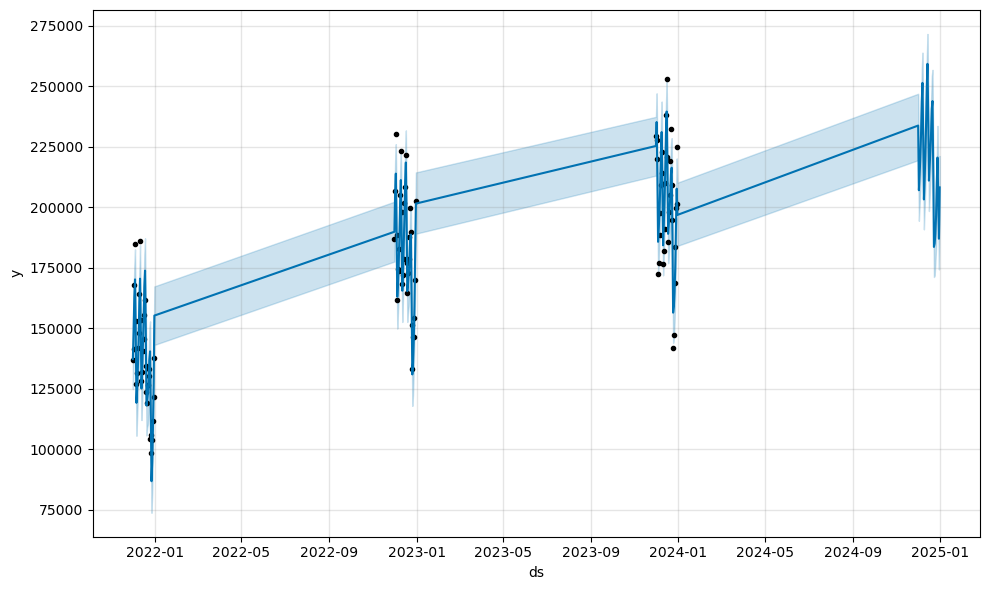

In [131]:
m_count.plot(forecast_count);

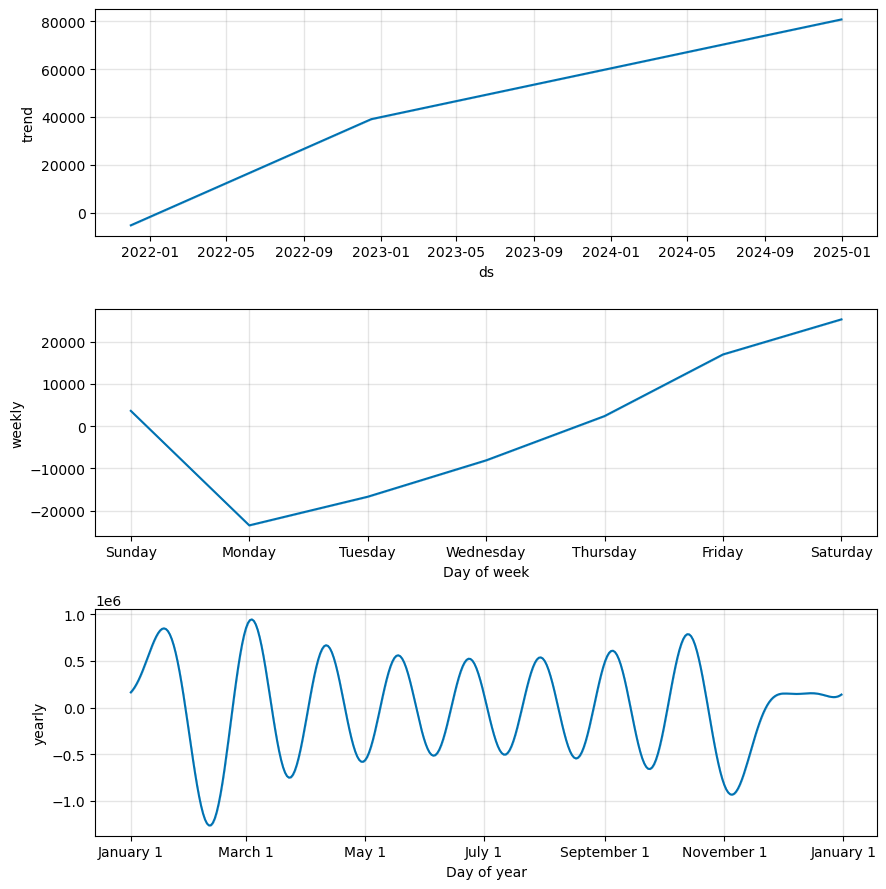

In [132]:
# Plot the individual time series components of the model
fig3 = m_count.plot_components(forecast_count);

In [133]:
forecast_count = forecast_count.set_index('ds')
forecast_count.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2024-12-27,80527.588962,196216.909867,221869.124257,80485.954668,80570.357215,129670.840422,129670.840422,129670.840422,16985.103325,16985.103325,16985.103325,112685.737097,112685.737097,112685.737097,0.0,0.0,0.0,210198.429384
2024-12-28,80583.538304,207935.151705,233645.925712,80538.785273,80628.875388,139950.659493,139950.659493,139950.659493,25296.758838,25296.758838,25296.758838,114653.900655,114653.900655,114653.900655,0.0,0.0,0.0,220534.197797
2024-12-29,80639.487645,191947.845446,216784.421610,80591.738040,80688.026120,123786.928377,123786.928377,123786.928377,3628.954113,3628.954113,3628.954113,120157.974264,120157.974264,120157.974264,0.0,0.0,0.0,204426.416022
2024-12-30,80695.436987,174327.235928,200341.053912,80644.969250,80747.492039,106322.123434,106322.123434,106322.123434,-23493.823039,-23493.823039,-23493.823039,129815.946473,129815.946473,129815.946473,0.0,0.0,0.0,187017.560421
2024-12-31,80751.386329,194780.604249,221169.649542,80697.759847,80805.541822,127456.425408,127456.425408,127456.425408,-16712.226002,-16712.226002,-16712.226002,144168.651410,144168.651410,144168.651410,0.0,0.0,0.0,208207.811736


<Axes: xlabel='ds'>

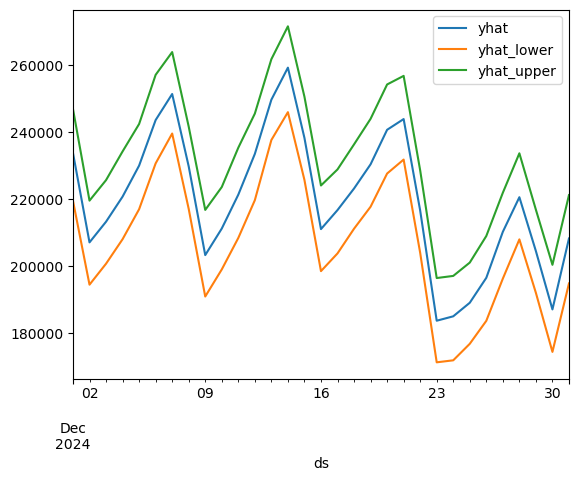

In [134]:
# Plot predictions for our forecast period
forecast_count[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-31:,:].plot()